# Sprint15課題 ディープラーニングフレームワーク2

##  1.この課題の目的
- フレームワークのコードを読めるようにする
- フレームワークを習得し続けられるようになる
- 理論を知っている範囲をフレームワークで動かす

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# フレームワーク
import tensorflow as tf
from tensorflow.keras import layers

import keras
from keras.datasets import mnist

from tqdm import tqdm_notebook as tqdm

Using TensorFlow backend.


In [2]:
# TensorFlowに同梱されているkeras、installしたkerasのversionを確認する
print(tf.VERSION)
print(tf.keras.__version__)

1.14.0
2.2.4-tf


## 2.公式Example
深層学習フレームワークには公式に様々なモデルのExampleコードが公開されている。

### 【問題1】公式Exampleを分担して実行
TensorFLowの公式Exampleを分担して実行する。

以下の中から1人ひとつ選び実行し、その結果を簡単に発表すること。

#### research

定番のモデルから最新のモデルまで多様なコードが公開されている。

[models/research at master · tensorflow/models](https://github.com/tensorflow/models/tree/master/research)

#### tutorials

TensorFLowのチュートリアルとして用意された簡単なモデルが含まれている。

[models/tutorials at master · tensorflow/models](https://github.com/tensorflow/models/tree/master/tutorials)

## チェックするExample(text classification)

- [text classification : 映画レビューのテキスト分類](https://www.tensorflow.org/tutorials/keras/basic_text_classification)
    
- データセット
    - Internet Movie Database(IMDB)の映画レビュー、件数：50,000件
    - レビューは訓練用とテスト用に25,000件ずつに分割されている
    -  訓練用とテスト用のデータは均衡しており、同数の肯定的、否定的なレビューを含む

In [0]:
# IMDB datasetのダウンロード
imdb = tf.keras.datasets.imdb

# 訓練データ中に出てくる単語のうち、最も頻繁に出現吸える10,000個を保持する
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [0]:
print("train_data_type : {}".format(type(train_data)))
print("len : {}".format(len(train_data)))
print("")
print("test_data_type : {}".format(type(test_data)))
print("len : {}".format(len(test_data)))

train_data_type : <class 'numpy.ndarray'>
len : 25000

test_data_type : <class 'numpy.ndarray'>
len : 25000


In [0]:
print(len(train_data[0]))
print(len(train_data[1]))

218
189


- 学習用データ：25,000サンプル
- テストデータ：25,000サンプル

In [0]:
# データの中身（特徴量）
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


- 各レビューに含まれるテキストに割り当てられたIDが特徴量として与えられている。

In [0]:
# データの中身（正解ラベル） => binary（"positive" or "negative"）
print(train_labels[0:10])

[1 0 0 1 0 0 1 0 1 0]


In [0]:
# 構造化（全体の10%）
movie_review_df = pd.DataFrame()

for i in tqdm(range(2500)):
    texts, counts = np.unique(train_data[i], return_counts=True)
    df = pd.DataFrame(index=[i], columns=texts, data=counts.reshape(1,-1))
    movie_review_df = movie_review_df.append(df)

movie_review_df = movie_review_df.fillna(0).astype(int)

In [0]:
col = np.array(movie_review_df.columns)
val = np.array(movie_review_df.sum())

/Users/makintosh/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


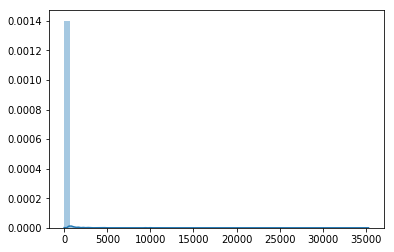

In [0]:
# 単語の出現頻度の分布を可視化
sns.distplot(val)

- レビューにおいて、一部の単語が頻出している様子が確認できる。

In [ ]:
# 単語をIDに変換する辞書
word_index = imdb.get_word_index()

In [0]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [0]:
decode_review(train_data[2])

"the as there in at by br of sure many br of proving no only women was than doesn't as you never of hat night that with ignored they bad out superman plays of how star so stories film comes defense date of wide they don't do that had with of hollywood br of my seeing fan this of pop out body shots in having because cause it's stick passing first were enjoys for from look seven sense from me and die in character as cuban issues but is you that isn't one song just is him less are strongly not are you that different just even by this of you there is eight when it part are film's love film's 80's was big also light don't and as it in character looked cinematography so stories is far br man acting"

In [0]:
# インデックスの最初の方は予約済み
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [0]:
decode_review(train_data[2])

"<START> this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally crying into their popcorn that they actually paid money they had <UNK> working to watch this feeble excuse for a film it must have looked like a great idea on paper but on film it looks like no one in the film has a clue what is going on crap acting crap costumes i can't get across how <UNK> this is to watch save yourself an hour a bit of your life"

In [0]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                       value=word_index["<PAD>"],
                                                       padding="post",
                                                       maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding="post",
                                                       maxlen=256)

#### モデルの構築

In [0]:
vocab_size = 10000

In [0]:
model = keras.Sequential()

model.add(keras.layers.Embedding(vocab_size, 16)) # 単語埋め込み
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


### [EmbeddingLayerについて](https://keras.io/ja/layers/embeddings/)

- 自然言語処理において単語埋め込み（Word Embedding）を行う。
    - 具体的には、正の整数（インデックス）を固定次元の密ベクトルに変換する． 例）[[4], [20]] -> [[0.25, 0.1], [0.6, -0.2]]
    - 多数のテキストを

- このレイヤーはモデルの最初のレイヤーとしてのみ利用できる．


- 入力のshape：shapeが(batch_size, sequence_length)の2階テンソル．


- 出力のshape：shapeが(batch_size, sequence_length, output_dim)の3階テンソル．


- 引数
    - input_dim: 正の整数．語彙数．入力データの最大インデックス + 1．
    - output_dim: 0以上の整数．密なembeddingsの次元数．
    - embeddings_initializer: embeddings行列のInitializers．
    - embeddings_regularizer: embeddings行列に適用するRegularizers．
    - embeddings_constraint: embeddings行列に適用するConstraints．
    

- 具体例：カテゴリデータ[1,2,3]に対して以下の処理を行う。（Embedding layerはカテゴリデータの線形変換を行う）

    1. エンコードを実行 => 1:[1,0,0], 2:[0,1,0], 3:[0,0,1]
    2. shapeが(3,k)の重み行列Wを乗じる
    3. 最終的にshapeが(3, k)のone-hot行列が生成される。（k：単語を埋め込む特徴量空間の次元数）

In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [0]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [0]:
history = model.fit(partial_x_train, partial_y_train,
                     epochs=40,
                     batch_size=512,
                     validation_data=(x_val, y_val),
                     verbose=1)

In [0]:
results = model.evaluate(test_data, test_labels)
print(results)

25000/25000 [==============================] - 0s 10us/step
[1.0695377220356463, 0.84372]


In [0]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

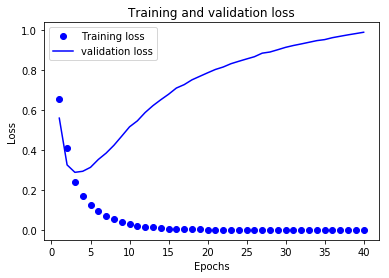

In [0]:
# ロス、正解率を可視化する

acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

- 学習曲線からは、モデルの過剰適合している様子が見て取れる。
- 汎化性能の観点では学習を途中でストップする必要があるかもしれない。

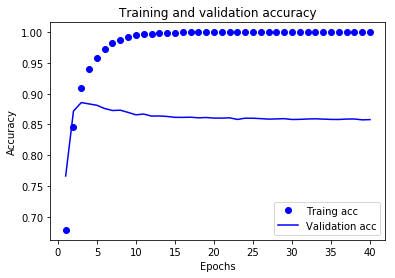

In [0]:
plt.clf()
acc_values = history_dict["acc"]
val_acc_values = history_dict["val_acc"]

plt.plot(epochs, acc, "bo", label="Traing acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## 3.異なるフレームワークへの書き換え
Sprint14で作成した4種類のデータセットを扱うTensorFLowのコードを異なるフレームワークに変更していく。

- Iris（Iris-versicolorとIris-virginicaのみの2値分類）
-  Iris（3種類全ての目的変数を使用して多値分類）
- House Prices
- MNIST

#### Kerasへの書き換え
KerasはTensorFLowに含まれるtf.kerasモジュールを使用すること。

KerasにはSequentialモデルかFunctional APIかなど書き方に種類があるが、これは指定しない。

[Keras](https://www.tensorflow.org/guide/keras)

[Keras:レイヤーの重み初期化方法](https://keras.io/ja/initializers/)

### 【問題2】Iris（2値分類）をKerasで学習
Sprint14で作成したIrisデータセットに対する2値分類をKerasに書き換える。

In [0]:
# データセットの準備
iris = datasets.load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris["target"] = iris.target

In [0]:
# 2値分類用に抽出
df_iris_2class = df_iris[df_iris["target"] != 2]
X_iris_2class = df_iris_2class.drop("target", axis=1).values
y_iris_2class = df_iris_2class["target"].values[:, np.newaxis]

# データを分割
X_train_iris2, X_val_iris2, y_train_iris2, y_val_iris2 = train_test_split(X_iris_2class, y_iris_2class, test_size=0.2, random_state=0)

#### ニューラルネットワークの前提

- 3層ニューラルネットワーク

In [0]:
# ハイパーパラメータ
activation = ["relu", "sigmoid", "tanh"] # 活性化関数
initializer = ["random_uniform"] # 初期化関数 

learning_rate = 1e-2 # 学習率
n_batch = 30 # バッチサイズ
n_epoch = 20 # エポック数
n_inputs = X_train_iris2.shape[1] # インプットの形状
n_nodes1 = 200 #1層目のノード数
n_nodes2 = 100 # 2層目のノード数
n_outputs = y_train_iris2.shape[1]# 3層目の出力の数

In [0]:
# モデルの生成
model = tf.keras.Sequential()

model.add(layers.Dense(n_nodes1, activation=activation[2],
                       input_shape=(n_inputs,), kernel_initializer=initializer[0], bias_initializer=initializer[0]))
model.add(layers.Dense(n_nodes2, activation=activation[2],
                      kernel_initializer=initializer[0], bias_initializer=initializer[0]))
model.add(layers.Dense(n_outputs, activation="sigmoid",
                      kernel_initializer=initializer[0], bias_initializer=initializer[0]))

model.compile(optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate),
                                              loss="binary_crossentropy",
                                              metrics=["accuracy"])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# 学習
history = model.fit(x=X_train_iris2, y=y_train_iris2, epochs=n_epoch,
                                 batch_size=n_batch, validation_data=(X_val_iris2, y_val_iris2),
                                 verbose=False)

# 予測
y_pred_prob = model.predict(X_val_iris2) #（予測確率）
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

Instructions for updating:
Use tf.cast instead.


#### 学習曲線

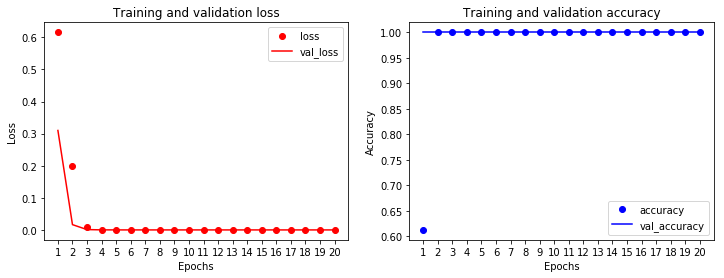

In [0]:
# 損失、および評価指標（accuracy）の推移
history_dict = history.history

loss = history_dict["loss"]
val_loss = history_dict["val_loss"]
acc = history_dict["acc"]
val_acc = history_dict["val_acc"]

epochs = range(1, len(loss)+1)

# 可視化
fig = plt.figure(figsize=(12, 4))

# 損失推移
plt.subplot(1,2,1)
plt.plot(epochs, loss, "ro", label="loss")
plt.plot(epochs, val_loss, "r", label="val_loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.xticks(epochs)

# accuracyの推移
plt.subplot(1,2,2)
plt.plot(epochs, acc, "bo", label="accuracy")
plt.plot(epochs, val_acc, "b", label="val_accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.xticks(epochs)

plt.show()

- validation dataにおいても損失が漸減しており、また、accuracyも上昇していることから学習が順調に進んでいることが確認される。

#### 予測結果の可視化

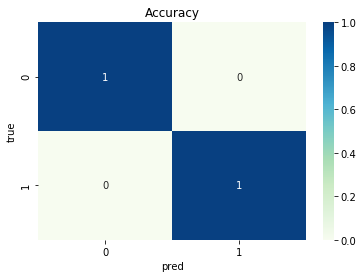

In [0]:
# ラベル
labels = np.unique(y_val_iris2)

# 混同行列
cmx = confusion_matrix(y_val_iris2, y_pred, labels=labels)
df = pd.DataFrame(cmx, index=labels, columns=labels)

# 値を正解率に変換
df = df.apply(lambda x: round(x/sum(x), 2), axis=1)

# 混同行列をヒートマップで可視化
sns.heatmap(df, annot=True, cmap="GnBu")
plt.xlabel("pred")
plt.ylabel("true")
plt.title("Accuracy")
plt.show()

- accuracyは全てのクラスにおいて100％を実現した。

### 【問題3】Iris（多値分類）をKerasで学習
Sprint14で作成したIrisデータセットに対する3値分類をKerasに書き換える。

In [0]:
# データセットの準備
X_iris = df_iris.drop("target", axis=1).values
y_iris = df_iris["target"].values[:, np.newaxis]

In [0]:
# one-hot-encoding
enc = OneHotEncoder(handle_unknown="ignore", sparse=False)
y_iris_onehot = enc.fit_transform(y_iris).astype(np.int)

In [0]:
# データセットの分割
X_train_iris, X_val_iris, y_train_iris, y_val_iris = train_test_split(X_iris, y_iris_onehot, test_size=0.2, random_state=0)
np.unique(y_train_iris, return_counts=True)

(array([0, 1]), array([240, 120]))

In [0]:
# ハイパーパラメータ
activation = ["relu", "sigmoid", "tanh"] # 活性化関数
initializer = ["random_uniform"] # 初期化関数 
learning_rate = 1e-3 # 学習率
n_batch = 30 # バッチサイズ
n_epoch = 100 # エポック数
n_inputs = X_train_iris.shape[1] # インプットの形状
n_nodes1 = 200 #1層目のノード数
n_nodes2 = 100 # 2層目のノード数
n_outputs = y_train_iris.shape[1]# 3層目の出力の数

In [0]:
# モデルのインスタンス生成
model_iris = tf.keras.Sequential()

# 層の生成
model_iris.add(layers.Dense(n_nodes1, activation=activation[1],
                           input_shape=(n_inputs,), kernel_initializer=initializer[0], bias_initializer=initializer[0]))
model_iris.add(layers.Dense(n_nodes2, activation=activation[1],
                           kernel_initializer=initializer[0], bias_initializer=initializer[0]))
model_iris.add(layers.Dense(n_outputs, activation="softmax",
                          kernel_initializer=initializer[0], bias_initializer=initializer[0]))

In [0]:
# モデルのコンパイル
model_iris.compile(optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate),
             loss="categorical_crossentropy",
             metrics=["accuracy"])

In [0]:
# 学習
history = model_iris.fit(X_train_iris, y_train_iris,
                        batch_size=n_batch,
                        epochs=n_epoch,
                        verbose=False,
                        validation_data=(X_val_iris, y_val_iris)
                        )

#### 学習曲線

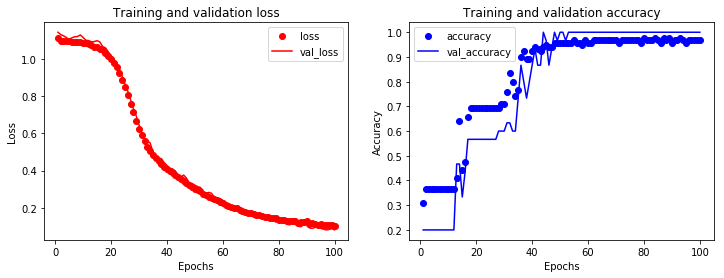

In [0]:
# 損失、および評価指標（accuracy）の推移
history_dict = history.history

loss = history_dict["loss"]
val_loss = history_dict["val_loss"]
acc = history_dict["acc"]
val_acc = history_dict["val_acc"]

epochs = range(1, len(loss)+1)

# 可視化
fig = plt.figure(figsize=(12, 4))

# 損失推移
plt.subplot(1,2,1)
plt.plot(epochs, loss, "ro", label="loss")
plt.plot(epochs, val_loss, "r", label="val_loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# accuracyの推移
plt.subplot(1,2,2)
plt.plot(epochs, acc, "bo", label="accuracy")
plt.plot(epochs, val_acc, "b", label="val_accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

- validation dataにおいても損失が漸減しており、また、accuracyも上昇していることから学習が順調に進んでいることが確認される。

#### 予測結果の可視化

In [0]:
# 予測
y_pred_prob_iris = model_iris.predict(X_val_iris)
y_pred_iris = np.argmax(y_pred_prob_iris, axis=1)

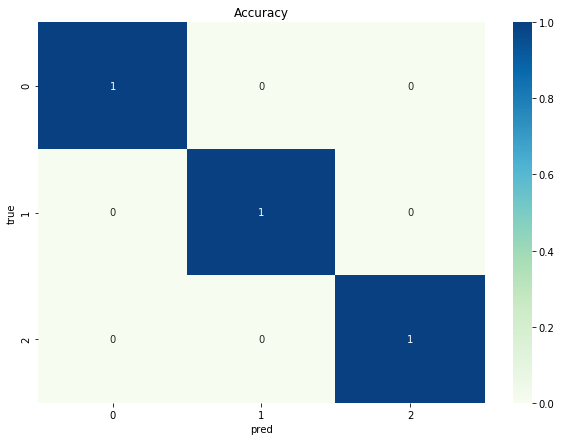

In [0]:
y_true = []

# one-hot表現から元のmulti-labelに戻す
for i in range(y_val_iris.shape[0]):
    for j in range(y_val_iris.shape[1]):
        if y_val_iris[i][j] == 1:
            y_true.append(j)

# テストデータの正解ラベル
labels = sorted(list(set(y_true)))

# 混同行列
cmx = confusion_matrix(y_true, y_pred_iris, labels=labels)
df = pd.DataFrame(cmx, index=labels, columns=labels)
df = df.apply(lambda x: round(x/sum(x),2), axis=1)

# ヒートマップによる混同行列の可視化
plt.figure(figsize = (10,7))
sns.heatmap(df, annot=True, cmap="GnBu")

plt.xlabel("pred")
plt.ylabel("true")
plt.title("Accuracy")
plt.show()

- accuracyは全てのクラスにおいて100％を実現した。

### 【問題4】House PricesをKerasで学習
Sprint14で作成したHouse Pricesデータセットに対する回帰をKerasに書き換える。

In [0]:
# データセットの準備
df_HP = pd.read_csv("train.csv")
df_HP_test = pd.read_csv("test.csv")

#df_HP.columns
X_HP = df_HP[["GrLivArea", "YearBuilt"]].values
y_HP = df_HP["SalePrice"].values[:, np.newaxis]

In [0]:
# データの2割を検証用とする
X_train_HP, X_val_HP, y_train_HP, y_val_HP = train_test_split(X_HP, y_HP, test_size=0.2, random_state=0)

In [ ]:
# 標準化
ss = StandardScaler()
X_train_HP_std = ss.fit_transform(X_train_HP)
X_val_HP_std = ss.fit_transform(X_val_HP)

In [0]:
# ハイパーパラメータ
activation = ["relu", "sigmoid", "tanh"] # 活性化関数
initializer = ["random_uniform"] # 初期化関数 

learning_rate = 1e-2 # 学習率
n_batch = 30 # バッチサイズ
n_epoch = 30 # エポック数
n_inputs = X_train_HP_std.shape[1] # インプットの形状
n_nodes1 = 400 #1層目のノード数
n_nodes2 = 200 # 2層目のノード数
n_outputs = y_train_HP.shape[1]# 3層目の出力の数

In [0]:
# モデルのインスタンス生成
model_HP = tf.keras.Sequential()

model_HP.add(layers.Dense(n_nodes1, activation=activation[0],
                         input_shape=(n_inputs,), kernel_initializer=initializer[0], bias_initializer=initializer[0]))
model_HP.add(layers.Dense(n_nodes2, activation=activation[0],
                          kernel_initializer=initializer[0], bias_initializer=initializer[0]))
model_HP.add(layers.Dense(n_outputs, activation=None,
                          kernel_initializer=initializer[0], bias_initializer=initializer[0]))

# モデルのコンパイル
model_HP.compile(optimizer=tf.train.AdamOptimizer(learning_rate),
                loss="mean_squared_error"
                )

Instructions for updating:
Use tf.cast instead.


In [0]:
# 学習
history_HP = model_HP.fit(X_train_HP_std, y_train_HP,
            batch_size=n_batch,
            epochs=n_epoch,
            verbose=False,
            validation_data=(X_val_HP_std, y_val_HP))

#### 学習曲線

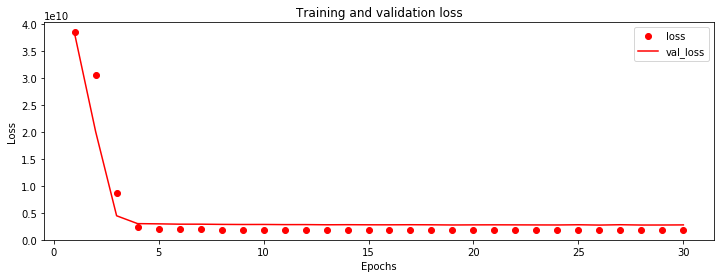

In [0]:
# 損失の推移
history_dict = history_HP.history

loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

epochs = range(1, len(loss)+1)

# 可視化
fig = plt.figure(figsize=(12, 4))

# 損失推移
#plt.subplot(1,2,1)
plt.plot(epochs, loss, "ro", label="loss")
plt.plot(epochs, val_loss, "r", label="val_loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

- validation dataにおいても損失が漸減しており、また、accuracyも上昇していることから学習が順調に進んでいることが確認される。

#### 予測結果の可視化

In [0]:
# 予測
y_pred_HP = model_HP.predict(X_val_HP_std)

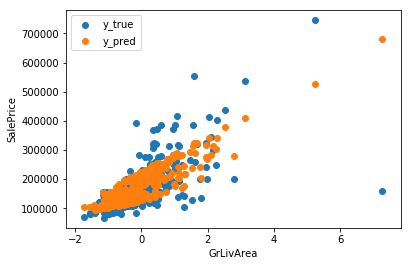

In [0]:
#可視化
plt.scatter(X_val_HP_std[:,0], y_val_HP, label="y_true")
plt.scatter(X_val_HP_std[:,0], y_pred_HP, label="y_pred")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.legend(loc="best")
plt.show()

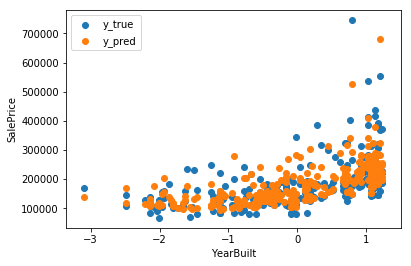

In [0]:
#可視化
plt.scatter(X_val_HP_std[:,1], y_val_HP, label="y_true")
plt.scatter(X_val_HP_std[:,1], y_pred_HP, label="y_pred")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.legend(loc="best")
plt.show()

### 【問題5】MNISTをKerasで学習
Sprint14で作成したMNISTデータセットによる画像の多値分類をKerasに書き換える。

In [0]:
# データセットの準備
(X_train_MN, y_train_MN), (X_test_MN, y_test_MN) = mnist.load_data()

In [0]:
# 正規化
X_train_MN = X_train_MN / np.max(X_train_MN)
X_test_MN = X_train_MN / np.max(X_test_MN)

In [0]:
# one_hot_encoding
enc = OneHotEncoder(sparse=False, handle_unknown="ignore")
y_train_MN_onehot = enc.fit_transform(y_train_MN[:, np.newaxis])

In [0]:
# 学習用データの一部を検証用とする
X_train_MN, X_val_MN, y_train_MN, y_val_MN = train_test_split(X_train_MN, y_train_MN_onehot, test_size=0.2, random_state=0)

In [0]:
# 平滑化
X_train_MN = X_train_MN.reshape(-1, 784)
X_val_MN = X_val_MN.reshape(-1, 784)
X_test_MN = X_test_MN.reshape(-1, 784)

In [0]:
# ハイパーパラメータ
activation = ["relu", "sigmoid", "tanh"] # 活性化関数
initializer = ["random_uniform"] # 初期化関数 
learning_rate = 1e-2 # 学習率
n_batch = 30 # バッチサイズ
n_epoch = 30 # エポック数
n_inputs = X_train_MN.shape[1] # インプットの形状
n_nodes1 = 400 #1層目のノード数
n_nodes2 = 200 # 2層目のノード数
n_outputs = y_train_MN.shape[1]# 3層目の出力の数

In [0]:
# モデルのインスタンスを生成
model_MN = tf.keras.Sequential()

# レイヤーの生成
model_MN.add(layers.Dense(n_nodes1, activation=activation[2],
                         input_shape=(n_inputs,), kernel_initializer=initializer[0], bias_initializer=initializer[0]))
model_MN.add(layers.Dense(n_nodes2, activation=activation[2],
                          kernel_initializer=initializer[0], bias_initializer=initializer[0]))
model_MN.add(layers.Dense(n_outputs, activation="softmax",
                          kernel_initializer=initializer[0], bias_initializer=initializer[0]))

In [0]:
# コンパイル
model_MN.compile(optimizer=tf.train.AdagradOptimizer(learning_rate=learning_rate),
                loss="categorical_crossentropy",
                metrics=["accuracy"])

In [0]:
# 学習
history_MN = model_MN.fit(X_train_MN, y_train_MN,
            batch_size=n_batch,
            epochs=n_epoch,
            verbose=False,
            validation_data=(X_val_MN, y_val_MN))

#### 学習曲線

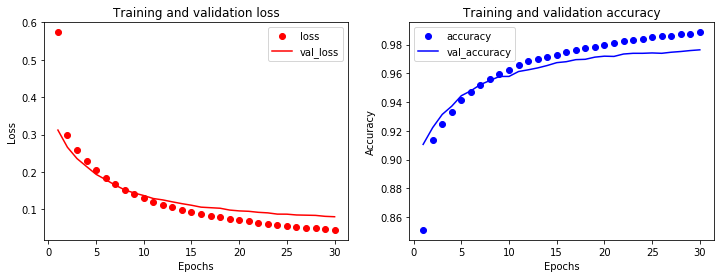

In [0]:
# 損失、および評価指標（accuracy）の推移
history_dict = history＿MN.history
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]
acc = history_dict["acc"]
val_acc = history_dict["val_acc"]

epochs = range(1, len(loss)+1)

# 可視化
fig = plt.figure(figsize=(12, 4))

# 損失推移
plt.subplot(1,2,1)
plt.plot(epochs, loss, "ro", label="loss")
plt.plot(epochs, val_loss, "r", label="val_loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# accuracyの推移
plt.subplot(1,2,2)
plt.plot(epochs, acc, "bo", label="accuracy")
plt.plot(epochs, val_acc, "b", label="val_accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

- validation dataにおいても損失が漸減しており、また、accuracyも上昇していることから学習が順調に進んでいることが確認される。

#### 予測結果の可視化

In [0]:
# 予測
y_pred_MN_prob = model_MN.predict(X_val_MN)
y_pred_MN = np.argmax(y_pred_MN_prob, axis=1)

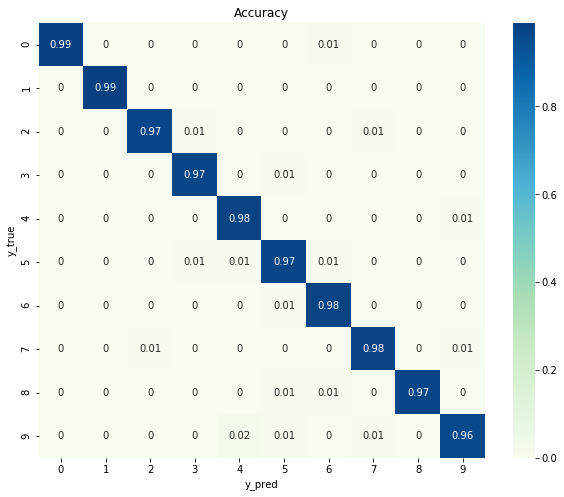

In [0]:
# 可視化
y_true = []

for i in range(y_val_MN.shape[0]):
    for j in range(y_val_MN.shape[1]):
        if y_val_MN[i][j] == 1:
            y_true.append(j)

labels = sorted(list(set(y_true)))

# 混同行列をデータフレーム化
cmx = confusion_matrix(y_true, y_pred_MN, labels=labels)
df = pd.DataFrame(cmx, index=labels, columns=labels)

# 混同行列の値を正解率に変換
df_accuracy = df.apply(lambda x:round(x/sum(x),2), axis=1)

# ヒートマップによる混同行列の可視化
plt.figure(figsize = (10,8))
sns.heatmap(df_accuracy, annot=True, cmap="GnBu")

plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Accuracy")
plt.show()

- いずれのクラスにおいても正解率が95%超であり、相応に高い予測精度のモデルが構築された。

### 【問題6】（アドバンス課題）PyTorchへの書き換え
4種類の問題をPyTorchに書き換える。

#### Pytorchの動作確認

In [0]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

In [4]:
x = torch.rand(5, 3)
print(x)

tensor([[0.8531, 0.4627, 0.9477],
        [0.6876, 0.2600, 0.7022],
        [0.5438, 0.6318, 0.9924],
        [0.7479, 0.9496, 0.3304],
        [0.6819, 0.9131, 0.4677]])


### Iris：2値分類問題

In [0]:
# データ（再掲）
X_train_iris2, X_val_iris2, y_train_iris2, y_val_iris2 = train_test_split(X_iris_2class, y_iris_2class, test_size=0.2, random_state=0)

# Tensorに変換
X_train_iris2 = torch.from_numpy(X_train_iris2).float()
X_val_iris2 = torch.from_numpy(X_val_iris2).float()
y_train_iris2 = torch.from_numpy(y_train_iris2).long().squeeze(1)
y_val_iris2 = torch.from_numpy(y_val_iris2).long().squeeze(1)

In [0]:
# ハイパーパラメータ
activation = ["relu", "sigmoid", "tanh"] # 活性化関数
initializer = ["random_uniform"] # 初期化関数 

learning_rate = 1e-2 # 学習率
n_batch = 5 # バッチサイズ
n_epoch = 1000 # エポック数
n_inputs = X_train_iris2.shape[1] # インプットの形状
n_nodes1 = 200 #1層目のノード数
n_nodes2 = 100 # 2層目のノード数
n_outputs = 2

In [0]:
# モデルの生成
model = nn.Sequential(
          nn.Linear(n_inputs, n_nodes1),
          nn.ReLU(),
          nn.Linear(n_nodes1, n_nodes2),
          nn.ReLU(),
          nn.Linear(n_nodes2, n_outputs),
          nn.Sigmoid()
          )

In [0]:
# 損失関数
loss_func = torch.nn.CrossEntropyLoss()

In [ ]:
# 学習
for t in tqdm(range(n_epoch)):
    
    y_pred = model(X_train_iris2)
    loss = loss_func(y_pred, y_train_iris2)
    losses.append(loss)
    
    print(t, loss.item())
    
    model.zero_grad()    
    loss.backward()
    
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate *  param.grad

In [0]:
y_pred_val_iris2 = model(X_val_iris2)

In [0]:
y_pred_val_iris2 = np.where(y_pred_val_iris2 > 0.5, 1, 0)

In [0]:
y_pred_val_iris2 = np.argmax(y_pred_val_iris2, axis=1)

In [0]:
y_val_iris2 = np.array(y_val_iris2)

#### 予測結果の可視化

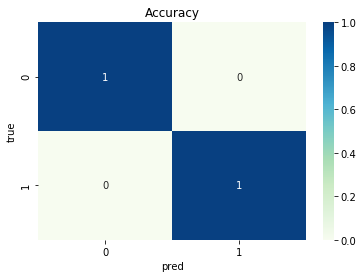

In [0]:
# ラベル
labels = np.unique(y_val_iris2)

# 混同行列
cmx = confusion_matrix(y_val_iris2, y_pred_val_iris2, labels=labels)
df = pd.DataFrame(cmx, index=labels, columns=labels)

# 値を正解率に変換
df = df.apply(lambda x: round(x/sum(x), 2), axis=1)

# 混同行列をヒートマップで可視化
plt.figure(figsize = (6,4))
sns.heatmap(df, annot=True, cmap="GnBu")
plt.xlabel("pred")
plt.ylabel("true")
plt.title("Accuracy")
plt.show()

- keras利用時と同様に、accuracyは全てのクラスにおいて100％を実現した。

### Iris：他値分類

In [0]:
# データセットの準備
X_iris = df_iris.drop("target", axis=1).values
y_iris = df_iris["target"].values[:, np.newaxis]

- Pytorchのcrossentropyは、正解ラベルにone-hotは想定していない。

In [0]:
# データセットの分割
X_train_iris, X_val_iris, y_train_iris, y_val_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=0)
np.unique(y_train_iris, return_counts=True)

(array([0, 1, 2]), array([39, 37, 44]))

In [0]:
# Tensorに変換
X_train_iris = torch.from_numpy(X_train_iris).float()
X_val_iris = torch.from_numpy(X_val_iris).float()
y_train_iris = torch.from_numpy(y_train_iris).long().squeeze(1)
y_val_iris = torch.from_numpy(y_val_iris).long().squeeze(1)

In [0]:
# ハイパーパラメータ
activation = ["relu", "sigmoid", "tanh"] # 活性化関数
initializer = ["random_uniform"] # 初期化関数 
learning_rate = 1e-2 # 学習率
n_batch = 30 # バッチサイズ
n_epoch = 2000 # エポック数
n_inputs = X_train_iris.shape[1] # インプットの形状
n_nodes1 = 200 #1層目のノード数
n_nodes2 = 100 # 2層目のノード数
n_outputs = 3# 3層目の出力の数

In [0]:
# モデルの生成
model = nn.Sequential(
          nn.Linear(n_inputs, n_nodes1),
          nn.ReLU(),
          nn.Linear(n_nodes1, n_nodes2),
          nn.ReLU(),
          nn.Linear(n_nodes2, n_outputs),
          nn.Softmax()
          )

In [0]:
# 損失関数
loss_func = torch.nn.CrossEntropyLoss()

In [ ]:
# 学習
for t in tqdm(range(n_epoch)):
    
    y_pred = model(X_train_iris)
    loss = loss_func(y_pred, y_train_iris)
    losses.append(loss)
    
    print(t, loss.item())
    
    model.zero_grad()    
    loss.backward()
    
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate *  param.grad

In [0]:
# 予測
y_pred_val_iris = model(X_val_iris)

/Users/makintosh/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [0]:
# 予測確率が最大となるindex
_, indices = torch.max(y_pred_val_iris, 1)

In [0]:
indices

tensor([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0, 0,
        2, 0, 0, 1, 1, 0])

In [0]:
y_pred_iris = np.array(indices)

In [0]:
y_val_iris = np.array(y_val_iris)

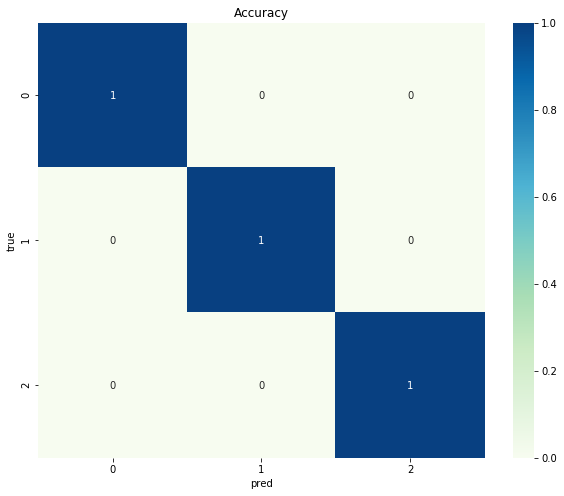

In [0]:
# テストデータの正解ラベル
labels = sorted(list(set(y_val_iris)))

# 混同行列
cmx = confusion_matrix(y_val_iris, y_pred_iris, labels=labels)
df = pd.DataFrame(cmx, index=labels, columns=labels)
df = df.apply(lambda x: round(x/sum(x),2), axis=1)

# ヒートマップによる混同行列の可視化
plt.figure(figsize = (10,8))
sns.heatmap(df, annot=True, cmap="GnBu")

plt.xlabel("pred")
plt.ylabel("true")
plt.title("Accuracy")
plt.show()

- keras利用時と同様に、accuracyは全てのクラスにおいて100％を実現した。

###  House Price

In [0]:
# データセットの準備
df_HP = pd.read_csv("train.csv")
df_HP_test = pd.read_csv("test.csv")

#df_HP.columns
X_HP = df_HP[["GrLivArea", "YearBuilt"]].values
y_HP = df_HP["SalePrice"].values[:, np.newaxis]

In [0]:
# データの2割を検証用とする
X_train_HP, X_val_HP, y_train_HP, y_val_HP = train_test_split(X_HP, y_HP, test_size=0.2, random_state=0)

In [ ]:
# 標準化
ss = StandardScaler()
ss.fit(X_train_HP)
X_train_HP_std = ss.transform(X_train_HP)
X_val_HP_std = ss.transform(X_val_HP)

ss.fit(y_train_HP)
y_train_HP_std = ss.transform(y_train_HP)
y_val_HP_std = ss.transform(y_val_HP)

In [0]:
# Tensorに変換
X_train_HP_std = torch.from_numpy(X_train_HP_std).float()
X_val_HP_std = torch.from_numpy(X_val_HP_std).float()
y_train_HP_std = torch.from_numpy(y_train_HP_std).float()
y_val_HP_std = torch.from_numpy(y_val_HP_std).float()

In [ ]:
y_train_HP_std

In [0]:
# ハイパーパラメータ
activation = ["relu", "sigmoid", "tanh"] # 活性化関数
initializer = ["random_uniform"] # 初期化関数 

learning_rate = 1e-2 # 学習率
n_batch = 30 # バッチサイズ
n_epoch = 2000 # エポック数
n_inputs = X_train_HP_std.shape[1] # インプットの形状
n_nodes1 = 400 #1層目のノード数
n_nodes2 = 200 # 2層目のノード数
n_outputs = 1 # 3層目の出力の数

In [0]:
# モデルの生成
model = nn.Sequential(
          nn.Linear(n_inputs, n_nodes1),
          nn.ReLU(),
          nn.Linear(n_nodes1, n_nodes2),
          nn.ReLU(),
          nn.Linear(n_nodes2, n_outputs)
          )

In [ ]:
# 学習
for t in tqdm(range(n_epoch)):
    
    y_pred = model(X_train_HP_std)
    loss = torch.nn.functional.mse_loss(y_pred, y_train_HP_std)
    
    print(t, loss.item())
    
    model.zero_grad()
    loss.backward()
    
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate *  param.grad

In [0]:
y_pred_HP_std = model(X_val_HP_std)

In [0]:
y_pred_HP_std = y_pred_HP_std.detach().numpy()

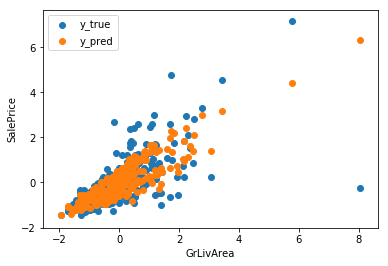

In [0]:
#可視化
plt.scatter(X_val_HP_std[:,0], y_val_HP_std, label="y_true")
plt.scatter(X_val_HP_std[:,0], y_pred_HP_std, label="y_pred")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.legend(loc="best")
plt.show()

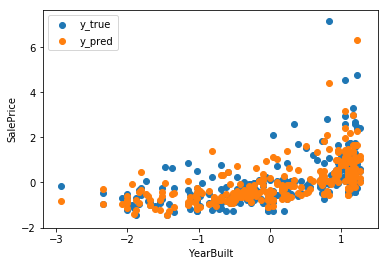

In [0]:
#可視化
plt.scatter(X_val_HP_std[:,1], y_val_HP_std, label="y_true")
plt.scatter(X_val_HP_std[:,1], y_pred_HP_std, label="y_pred")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.legend(loc="best")
plt.show()

### MNIST

In [0]:
# データセットの準備
(X_train_MN, y_train_MN), (X_test_MN, y_test_MN) = mnist.load_data()

In [0]:
# 正規化
X_train_MN = X_train_MN / np.max(X_train_MN)
X_test_MN = X_test_MN / np.max(X_test_MN)

In [0]:
# 学習用データの一部を検証用とする
X_train_MN, X_val_MN, y_train_MN, y_val_MN = train_test_split(X_train_MN, y_train_MN, test_size=0.2, random_state=0)

In [0]:
# 平滑化
X_train_MN = X_train_MN.reshape(-1, 784)
X_val_MN = X_val_MN.reshape(-1, 784)
X_test_MN = X_test_MN.reshape(-1, 784)

In [0]:
# Tensorに変換
X_train_MN = torch.from_numpy(X_train_MN).float()
X_val_MN = torch.from_numpy(X_val_MN).float()
X_test_MN = torch.from_numpy(X_test_MN).float()

y_train_MN = torch.from_numpy(y_train_MN).long()
y_val_MN = torch.from_numpy(y_val_MN).long()
y_test_MN = torch.from_numpy(y_test_MN).long()

In [0]:
# ハイパーパラメータ
activation = ["relu", "sigmoid", "tanh"] # 活性化関数
initializer = ["random_uniform"] # 初期化関数 
learning_rate = 1e-2 # 学習率
n_batch = 128 # バッチサイズ
n_epoch = 30000 # エポック数
n_inputs = X_train_MN.shape[1] # インプットの形状
n_nodes1 = 400 #1層目のノード数
n_nodes2 = 200 # 2層目のノード数
n_outputs = len(np.unique(y_train_MN))# 3層目の出力の数

In [0]:
ds_train = TensorDataset(X_train_MN, y_train_MN)
ds_test = TensorDataset(X_test_MN, y_test_MN)

In [0]:
loader_train = DataLoader(ds_train, batch_size=n_batch, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=1, shuffle=False)

In [173]:
# モデルの生成
from torch import nn
 
model = nn.Sequential()
model.add_module('fc1', nn.Linear(28*28, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100, 10))
 
print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [0]:
from torch import optim
 
# 誤差関数の設定
loss_fn = nn.CrossEntropyLoss()  # 変数名にはcriterionも使われる
 
# 重みを学習する際の最適化手法の選択
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [0]:
from torch.autograd import Variable
 
def train(epoch):
    model.train()  # ネットワークを学習モードに切り替える

    # データローダーから1ミニバッチずつ取り出して計算する
    for data, target in tqdm(loader_train):
        data, target = Variable(data), Variable(target)  # 微分可能に変換
        optimizer.zero_grad()  # 一度計算された勾配結果を0にリセット
        
        output = model(data)  # 入力dataをinputし、出力を求める
        loss = loss_fn(output, target)  # 出力と訓練データの正解との誤差を求める
        loss.backward()  # 誤差のバックプロパゲーションを求める
        optimizer.step()  # バックプロパゲーションの値で重みを更新する

    print("epoch{}：終了\n".format(epoch))

In [176]:
train(n_epoch)


epoch30000：終了



In [0]:
y_pred = []

def test():
    model.eval()  # ネットワークを推論モードに切り替える
    correct = 0
 
    # データローダーから1ミニバッチずつ取り出して計算する
    for data, target in loader_test:
        data, target = Variable(data), Variable(target)  # 微分可能に変換
        output = model(data)  # 入力dataをinputし、出力を求める
 
        # 推論する
        pred = output.data.max(1, keepdim=True)[1]  # 出力ラベルを求める
        y_pred.append(pred)
        correct += pred.eq(target.data.view_as(pred)).sum()  # 正解と一緒だったらカウントアップ
 
    # 正解率を出力
    data_num = len(loader_test.dataset)  # データの総数
    print('\naccuracy: {}/{} ({:.0f}%)\n'.format(correct,
                                                   data_num, 100. * correct / data_num))

In [187]:
test()


accuracy: 9557/10000 (95%)



In [188]:
y_pred_MN = np.zeros(len(X_test_MN))
y_pred_MN.shape

(10000,)

In [0]:
# numpy配列に変換
for i in range(len(y_pred)):
    y_pred_MN[i] = y_pred[i].numpy()

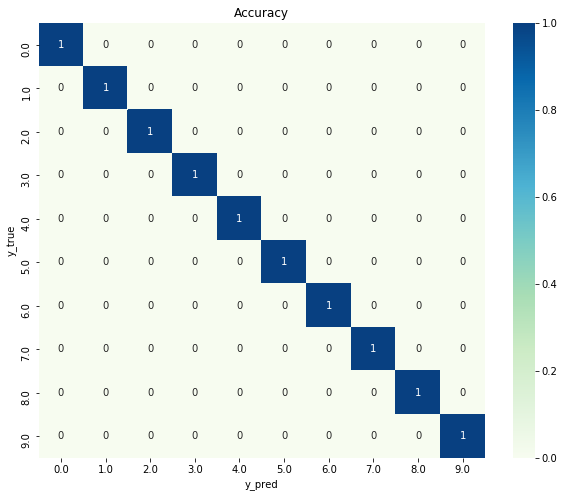

In [190]:
# 可視化
labels = sorted(list(set(y_test_MN)))

# 混同行列をデータフレーム化
cmx = confusion_matrix(y_test_MN, y_pred_MN, labels=labels)
df = pd.DataFrame(cmx, index=labels, columns=labels)

# 混同行列の値を正解率に変換
df_accuracy = df.apply(lambda x:round(x/sum(x),2), axis=1)

# ヒートマップによる混同行列の可視化
plt.figure(figsize = (10,8))
sns.heatmap(df_accuracy, annot=True, cmap="GnBu")

plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Accuracy")
plt.show()

- いずれのクラスも正解率が約100%となった。

### Take away


- keras, Pytorchという２つのフレームワークを利用することで、効率的にニューラルネットワークを構築できることがわかった。

- 但し、フレームワーク毎に、入力値の前処理（データ型変換等）やモデルの記述などに差異があるため、様々なパターンでフレームワークを利用し、それぞれの違いに関する理解を深めたい。